In [1]:
from PIL import Image
from pathlib import Path
import os

CWD = os.getcwd() # current working directory
img_list = os.listdir(Path(f"{CWD}/imgs/imgs/"))
width_list, height_list = [], []
for img in img_list:
    img_path = Path(f"{CWD}/imgs/imgs/{img}")
    img = Image.open(img_path)
    width_list.append(img.size[0])
    height_list.append(img.size[1])
print(max(width_list),max(height_list))
print(min(width_list),min(height_list))

4800 2531
300 168


In [2]:
import numpy as np

BATCH_SIZES = [32, 32, 32, 16, 16, 8, 8, 4] # tune for my GPU
# PROGRESSIVE_EPOCHS = [30] * len(BATCH_SIZES)
PROGRESSIVE_EPOCHS = list(np.linspace(10, 30, len(BATCH_SIZES), dtype=int))
PROGRESSIVE_EPOCHS

[10, 12, 15, 18, 21, 24, 27, 30]

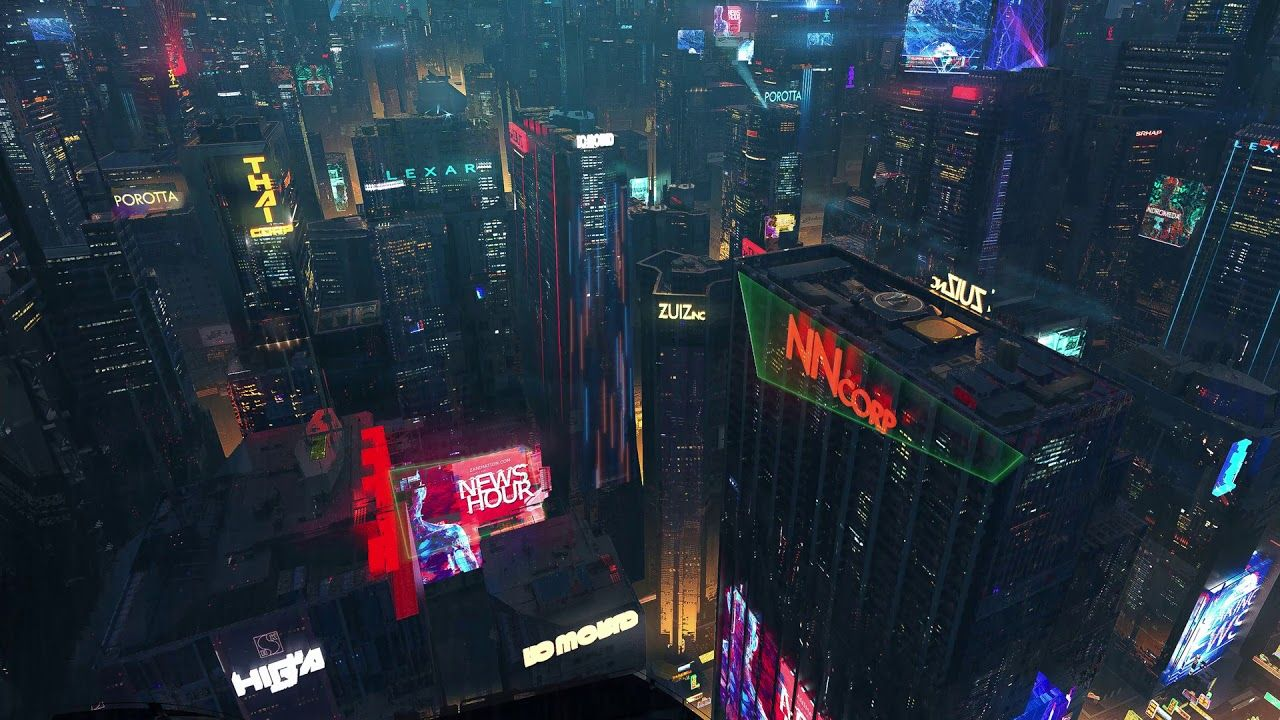

In [112]:
from PIL import Image
from pathlib import Path
import os
CWD = os.getcwd() # current working directory
img_list = os.listdir(Path(f"{CWD}/imgs/imgs/"))
img_path = Path(f"{CWD}/imgs/imgs/{img_list[1]}")
img = Image.open(img_path)
img

In [93]:
import torchvision.transforms as transforms
# transform = transforms.Compose([
#     # transforms.RandomRotation(degrees=(0,180)),
#     transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=(0.1, 0.6), hue=(-0.5, 0.5)),
#     transforms.RandomAffine(degrees=(0, 180), translate=(0.1, 0.3), scale=(0.25, 0.75))
# ])

transform = transforms.Compose(
        [
            transforms.Resize(512),
            transforms.RandomCrop((512, 512)),
            transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=(0.1, 0.6), hue=(-0.5, 0.5)),
            transforms.RandomAffine(degrees=(0, 180), scale=(0.75, 1)),
            transforms.CenterCrop(256),
            transforms.Resize((256, 256)),
            transforms.RandomHorizontalFlip(p=0.5),
        ]
    )

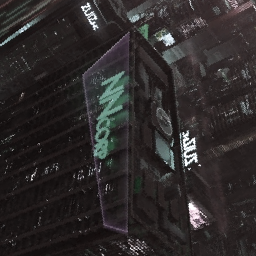

In [131]:
# tr_imgs = [transform(img) for _ in range(4)]
# tr_imgs[3]

tr_img = transform(img)
tr_img